In [ ]:
# default_exp custering_and_neighbours

# Clustering and Neighbour Lookups
> Just some experimentation on clustering (unsupervised) and nearest neighbour loopups (supervised) 

In [ ]:
#export
from nbdev.showdoc import *
import jovsatools
import fastcore
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import defaultdict

### KNN - Using Dummy Data

Goal: KNN hard clustering vs. soft clustering

In [ ]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [ ]:
# helpers

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=10)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=10, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    

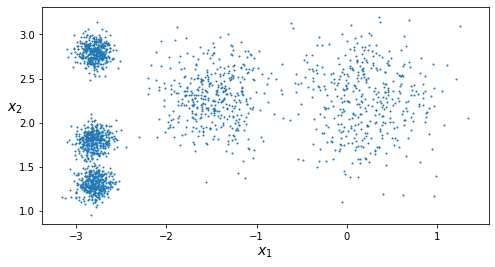

In [ ]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

#### Using a library - Sklearn

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

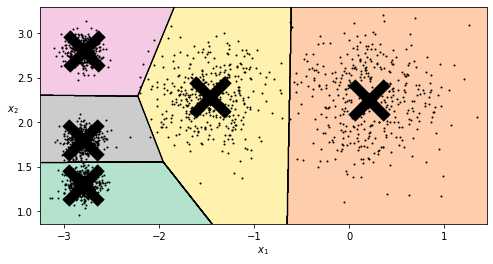

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [ ]:
# soft clustering
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])

kmeans.transform(X_new)

array([[2.88633901, 0.32995317, 2.9042344 , 1.49439034, 2.81093633],
       [5.84236351, 2.80290755, 5.84739223, 4.4759332 , 5.80730058],
       [1.71086031, 3.29399768, 0.29040966, 1.69136631, 1.21475352],
       [1.21567622, 3.21806371, 0.36159148, 1.54808703, 0.72581411]])

In [ ]:
# hard clustering
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

#### Replicate above code with python

In [ ]:
class KMeans:
    def __init__(self, x):
        self.x = x
        self.seed = np.random.seed(10)
    

    def init_centroids(self, k, initilization='random'):
        
        choices = np.random.choice(self.x.shape[0], k)
        return self.x[choices]
    
    def euclid_dist(self, x, y):
        return np.linalg.norm(x-y)
    
    def fit(self, k, initilization='random'):
        if initilization != 'random':
            raise NotImplementedError
        # 0: calc centroids
        centroids = self.init_centroids(k, initilization)
        print("centroids:\n", centroids)
        for _ in range(2):
        
            # 1: find distance to each centroid
            dists = np.zeros((self.x.shape[0], k))
            for x_idx, point in enumerate(self.x):
                for c_idx, centroid in enumerate(centroids):
                    print(f"point: {point}  centroid: {centroid}")
                    dists[x_idx, c_idx] = self.euclid_dist(point, centroid)

#             print(dists)
            # 2: find new location
            closest_centroids = np.argmax(dists, axis=1)
            
            chosen_points = defaultdict(list)
            
            for c_idx, chosen in enumerate(closest_centroids):
                curr_point = self.x[c_idx] 
                curr_centroid = centroids[chosen]
                chosen_points[chosen].append(curr_point)
                    
            for k, v in chosen_points.items():
                print(k, "v:", v, np.mean(v,axis=0))
                centroids[k] = np.mean(v, axis=0)
            # 3: decide to stop?
        
        print(centroids)
        print(centroids.shape)
    
    def predict(self, y):
        pass

print(f"X: {X_new.shape}")
kmeans = KMeans(X_new)
kmeans.fit(k=5)

X: (4, 2)
centroids:
 [[ 3.   2. ]
 [ 3.   2. ]
 [ 0.   2. ]
 [-3.   2.5]
 [ 0.   2. ]]
point: [0. 2.]  centroid: [3. 2.]
point: [0. 2.]  centroid: [3. 2.]
point: [0. 2.]  centroid: [0. 2.]
point: [0. 2.]  centroid: [-3.   2.5]
point: [0. 2.]  centroid: [0. 2.]
point: [3. 2.]  centroid: [3. 2.]
point: [3. 2.]  centroid: [3. 2.]
point: [3. 2.]  centroid: [0. 2.]
point: [3. 2.]  centroid: [-3.   2.5]
point: [3. 2.]  centroid: [0. 2.]
point: [-3.  3.]  centroid: [3. 2.]
point: [-3.  3.]  centroid: [3. 2.]
point: [-3.  3.]  centroid: [0. 2.]
point: [-3.  3.]  centroid: [-3.   2.5]
point: [-3.  3.]  centroid: [0. 2.]
point: [-3.   2.5]  centroid: [3. 2.]
point: [-3.   2.5]  centroid: [3. 2.]
point: [-3.   2.5]  centroid: [0. 2.]
point: [-3.   2.5]  centroid: [-3.   2.5]
point: [-3.   2.5]  centroid: [0. 2.]
3 v: [array([0., 2.]), array([3., 2.])] [1.5 2. ]
0 v: [array([-3.,  3.]), array([-3. ,  2.5])] [-3.    2.75]
point: [0. 2.]  centroid: [-3.    2.75]


IndexError: index 0 is out of bounds for axis 1 with size 0

## References
* [Hands on ML](https://github.com/ageron/handson-ml2)
* [Sklearn Nearest Neighbors (supervised)](https://scikit-learn.org/stable/modules/neighbors.html)
* [Sklearn Clustering (unsupervised)](https://scikit-learn.org/stable/modules/clustering.html#clustering)

In [ ]:
np_array_2d = np.arange(0, 6).reshape([2,3])
np_array_2d

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
np.sum(np_array_2d, axis=0)

array([3, 5, 7])

In [ ]:
print(np_array_2d[:,0])
print(np_array_2d[:,1])
print(np_array_2d[:,2])

[0 3]
[1 4]
[2 5]


In [ ]:
x = np.asarray([1,2,1,1,3,4])
